# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

city_name = []
country = []
lat = []
long = []
temperatures = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []

counter = 1

for city in cities: 
       
    try: 
        response = requests.get(f"{url}&q={city}").json()
        city_name.append(response['name'])
        country.append(response["sys"]["country"])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temperatures.append(response['main']['temp'])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        print(f'City number {counter} complete. Added {city}')
        counter += 1

    except:
        print("City not found. Skipping...")
    continue
        
print('----------------------------------------------')
print('------------Data Retrieval Complete-----------')        

City number 1 complete. Added hithadhoo
City not found. Skipping...
City number 2 complete. Added pemangkat
City number 3 complete. Added north bend
City number 4 complete. Added porto walter
City number 5 complete. Added albany
City not found. Skipping...
City number 6 complete. Added cape town
City number 7 complete. Added ushtobe
City number 8 complete. Added sao paulo de olivenca
City number 9 complete. Added georgetown
City number 10 complete. Added vaini
City number 11 complete. Added punta arenas
City not found. Skipping...
City number 12 complete. Added sterling
City not found. Skipping...
City number 13 complete. Added taungdwingyi
City number 14 complete. Added macau
City number 15 complete. Added millinocket
City number 16 complete. Added mount isa
City number 17 complete. Added port blair
City number 18 complete. Added torbay
City not found. Skipping...
City number 19 complete. Added upernavik
City number 20 complete. Added new norfolk
City number 21 complete. Added hilo
Ci

City number 188 complete. Added soyo
City number 189 complete. Added puerto escondido
City number 190 complete. Added grand-santi
City number 191 complete. Added aklavik
City number 192 complete. Added lahad datu
City number 193 complete. Added bouna
City number 194 complete. Added melfi
City number 195 complete. Added kodiak
City number 196 complete. Added meulaboh
City number 197 complete. Added chokurdakh
City number 198 complete. Added cabedelo
City not found. Skipping...
City number 199 complete. Added ponta do sol
City number 200 complete. Added egvekinot
City number 201 complete. Added portland
City number 202 complete. Added chebarkul
City number 203 complete. Added waitati
City number 204 complete. Added fare
City number 205 complete. Added deep river
City number 206 complete. Added barrow
City number 207 complete. Added east london
City number 208 complete. Added nanakuli
City number 209 complete. Added alyangula
City number 210 complete. Added hamilton
City not found. Skippi

City number 374 complete. Added abha
City number 375 complete. Added mitu
City number 376 complete. Added boa vista
City number 377 complete. Added la fria
City number 378 complete. Added santa maria
City number 379 complete. Added laguna
City number 380 complete. Added kargasok
City number 381 complete. Added siraha
City number 382 complete. Added lerwick
City number 383 complete. Added asfi
City number 384 complete. Added saint-augustin
City not found. Skipping...
City number 385 complete. Added mobara
City number 386 complete. Added phan thiet
City number 387 complete. Added buchanan
City number 388 complete. Added awbari
City number 389 complete. Added wanning
City not found. Skipping...
City number 390 complete. Added la reforma
City number 391 complete. Added champerico
City number 392 complete. Added alamosa
City number 393 complete. Added mirador
City number 394 complete. Added shimoda
City number 395 complete. Added lorengau
City number 396 complete. Added lujan
City number 39

City number 565 complete. Added nueve de julio
City number 566 complete. Added tromso
City not found. Skipping...
City number 567 complete. Added faya
City number 568 complete. Added armidale
----------------------------------------------
------------Data Retrieval Complete-----------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [130]:
#create new df
weather_py = pd.DataFrame ({
    "city": city_name,
    "lat": lat,
    "lng": long,
    'max_temp': max_temp,
    'humidity': humidity,
    'cloudiness': cloudiness,
    'wind_speed': wind_speed,
    'country': country,
    'date': date
})
#save df as .csv to output_data folder
weather_py.to_csv("../output_data/cities.csv")
weather_py.head()

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Hithadhoo,-0.60,73.08,83.28,71,22,4.50,MV,1597546061
1,Pemangkat,1.17,108.97,79.72,78,86,6.71,ID,1597546061
2,North Bend,43.41,-124.22,73.00,63,1,5.82,US,1597546061
3,Porto Walter,-8.27,-72.74,76.71,75,6,2.55,BR,1597546061
4,Albany,42.60,-73.97,71.01,66,74,5.82,US,1597546061


In [131]:
#verify final count of data
weather_py.count()

city          568
lat           568
lng           568
max_temp      568
humidity      568
cloudiness    568
wind_speed    568
country       568
date          568
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [132]:
#check humidity % for any over 100. If none, move on. (There are none, moving on...)
humidity_check = weather_py.loc[:, 'humidity'].unique()
humidity_check

array([ 71,  78,  63,  75,  66,  93,  24,  77,  79,  68,  88,  86,  74,
        17,  76,  87,  90,  69,  82,  72,  73,  42, 100,  57,  94,  70,
        84,  80,  20,  92,  97,  51,  64,  46,  49,  38,  59,  32,  55,
        60,  54,  83,  34,  47,  21,  58,  91,  85,  48,  61,  62,  52,
        96,  18,  67,  44,  95,   8,  65,  53,  89,  43,  33,  23,  81,
        40,  29,  37,  41,   6,  14,  30,  45,   9,  31,  50,  28,  19,
        56,  27,  98,  39,  35,  10], dtype=int64)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

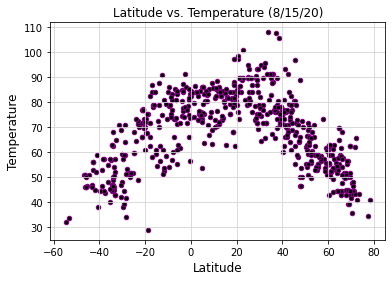

In [133]:
#create scatterplot
ax1 = weather_py.plot.scatter(x='lat', y='max_temp',edgecolors='purple', c='black')
plt.grid(b=True, which='major', axis='both', linestyle="-", color='lightgrey')
plt.title('Latitude vs. Temperature (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Temperature', size=12)
plt.savefig("../output_data/lat_temp.png")
plt.show()

#Latitude vs. Temp Breakdown:
This is showing that the cities that lie between 0 and about 40 degrees latitude are warmest. On the flip side, there are some cities that are both warm and cool from 0 to -20. I also see that from -60 to 0 there is a positive correlation, with temps increasing as latitude nears 0. There is also a negative correlation from 0 to 80, temps decrease as cities move further away from 0. 

## Latitude vs. Humidity Plot

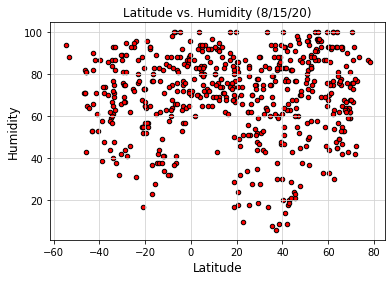

In [134]:
#create scatterplot
ax1 = weather_py.plot.scatter(x='lat', y='humidity',edgecolors='black', c='red')
plt.grid(b=True, which='major', axis='both', linestyle="-", color='lightgrey')
plt.title('Latitude vs. Humidity (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Humidity', size=12)
plt.savefig("../output_data/lat_humidity.png")
plt.show()

#Lat vs. Humidity Breakdown:
There isn't a whole lot of correlation here. The northern hemisphere humidity is all over the place. However, the cities that are between 0 and 20 latitude do seem to have a higher percentage of humidity. The Southern Hemisphere doesn't show too many cities with humidity below 20%. From 0 to 20 latitude, humidity is bounded between 60 and 100. When latitude is below 0 it's sparse. Overall, there is not a strong correlation.

## Latitude vs. Cloudiness Plot

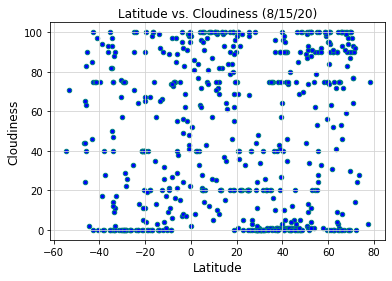

In [135]:
#create scatterplot
ax1 = weather_py.plot.scatter(x='lat', y='cloudiness',edgecolors='teal', c='blue')
plt.grid(b=True, which='major', axis='both', linestyle="-", color='lightgrey')
plt.title('Latitude vs. Cloudiness (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Cloudiness', size=12)
plt.savefig("../output_data/lat_cloudiness.png")
plt.show()

#Latitude vs. Cloudiness breakdown:
This is pretty scattered. It looks like the closer you are to the equater the more scattered the cloudiness. However, there are also some extremes. From -20 to -40ish and 20-75ish latitude, there are trends of clouds with 0%. However, there are also some trends of 100% cloudiness in the 20 - 75 range. Overall, there is no correlation between the two.

## Latitude vs. Wind Speed Plot

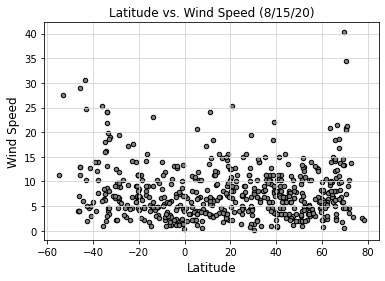

In [136]:
#create scatterplot
ax1 = weather_py.plot.scatter(x='lat', y='wind_speed',edgecolors='black', c='grey')
plt.grid(b=True, which='major', axis='both', linestyle="-", color='lightgrey')
plt.title('Latitude vs. Wind Speed (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Wind Speed', size=12)
plt.savefig("../output_data/lat_wind.png")
plt.show()

#Latitude vs. Wind Speed Breakdown:
It appears as though the wind speed is mostly low. Latitude does not appear to make a difference in wind speed as majority of it is fairly similar. Again, I would say that there is no correlation between the two.

## Linear Regression

In [137]:
# OPTIONAL: Create a function to create Linear Regression plots

In [138]:
#create df for cities in northern hemisphere
north_hem = weather_py[weather_py.lat > 0]
north_hem

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
1,Pemangkat,1.17,108.97,79.72,78,86,6.71,ID,1597546061
2,North Bend,43.41,-124.22,73.00,63,1,5.82,US,1597546061
4,Albany,42.60,-73.97,71.01,66,74,5.82,US,1597546061
6,Ushtobe,45.25,77.98,80.58,24,5,13.62,KZ,1597546062
8,George Town,5.41,100.34,86.00,79,20,1.12,MY,1597545844
...,...,...,...,...,...,...,...,...,...
561,Aykhal,66.00,111.50,57.20,47,0,2.24,RU,1597546161
562,Soto la Marina,23.77,-98.22,81.00,87,33,4.00,MX,1597545964
563,Puerto Colombia,10.99,-74.95,82.40,83,75,6.93,CO,1597546162
565,Tromsø,69.65,18.96,44.60,81,87,40.26,NO,1597546162


In [139]:
#create df for cities in southern hemisphere
south_hem = weather_py[weather_py.lat < 0]
south_hem

,city,lat,lng,max_temp,humidity,cloudiness,wind_speed,country,date
0,Hithadhoo,-0.60,73.08,83.28,71,22,4.50,MV,1597546061
3,Porto Walter,-8.27,-72.74,76.71,75,6,2.55,BR,1597546061
5,Cape Town,-33.93,18.42,48.99,93,75,8.05,ZA,1597545812
7,São Paulo de Olivença,-3.38,-68.87,76.59,77,56,1.32,BR,1597546062
9,Vaini,-21.20,-175.20,71.60,68,40,13.87,TO,1597546062
...,...,...,...,...,...,...,...,...,...
552,Waipawa,-41.41,175.52,52.00,71,75,12.75,NZ,1597546159
553,Bloemfontein,-29.12,26.21,39.20,69,0,4.70,ZA,1597546159
558,Vao,-22.67,167.48,70.09,77,13,17.63,NC,1597546161
564,Nueve de Julio,-35.44,-60.88,39.99,44,0,1.01,AR,1597546162


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7342722721715016


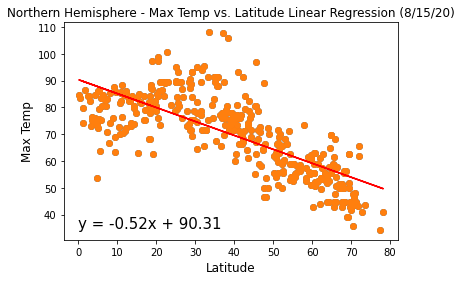

In [140]:
#create scatter plot using hemisphere dataframe
x_values = north_hem['lat']
y_values = north_hem['max_temp']
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Max Temp', size=12)


## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,35), fontsize = 15, color="black")

print(f'The r-squared is: {rvalue}')
plt.savefig("../output_data/reg_north_lat_temp.png")
plt.show()


Northern Hemisphere - Temp vs. Lat: From 0-20 latitude, as values increase, temps increase. As soon as latitude starts to increase, temperatures begin to decrease. There is a negative correlation and r-squared is good but not great. 


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7328741050143442


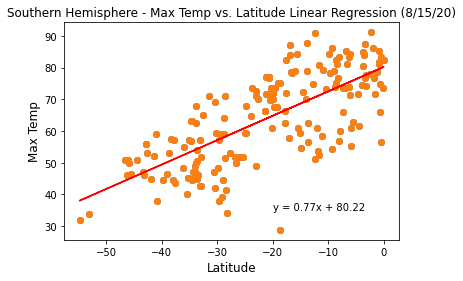

In [141]:
#create scatter plot using hemisphere dataframe
x_values = south_hem['lat']
y_values = south_hem['max_temp']
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Max Temp', size=12)

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,35), fontsize = 10, color="black")
plt.savefig("../output_data/reg_south_lat_temp.png")
print(f'The r-squared is: {rvalue}')
plt.show()

The fit of the linear regression is good but not great. There is a positive relationship. As latitue increases so do tempereatures.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.038296452243842455


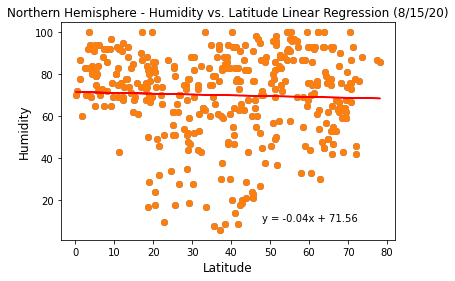

In [142]:
#create scatter plot using hemisphere dataframe
x_values = north_hem['lat']
y_values = north_hem['humidity']
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Humidity', size=12)

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (48,10), fontsize = 10, color="black")
plt.savefig("../output_data/reg_north_lat_humidity.png")
print(f'The r-squared is: {rvalue}')
plt.show()

There is no correclation between humidity and latitude. The low value of r-squared implies that linear regression does not fit the data well. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.025626784535894453


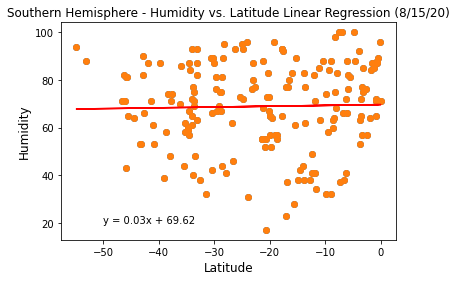

In [143]:
#create scatter plot using hemisphere dataframe
x_values = south_hem['lat']
y_values = south_hem['humidity']
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Humidity', size=12)

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize = 10, color="black")
plt.savefig("../output_data/reg_south_lat_humidity.png")
print(f'The r-squared is: {rvalue}')
plt.show()

Again, there is no correclation between humidity and latitude. The low value of r-squared implies that linear regression does not fit the data well. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03237322065580149


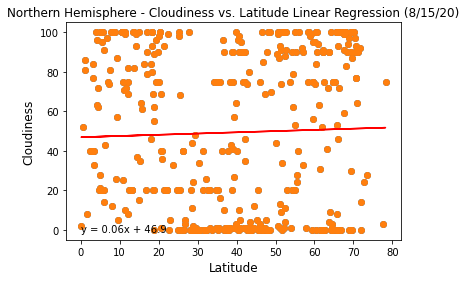

In [144]:
#create scatter plot using hemisphere dataframe
x_values = north_hem['lat']
y_values = north_hem['cloudiness']
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Cloudiness', size=12)

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,-1), fontsize = 10, color="black")
plt.savefig("../output_data/reg_north_lat_cloud.png")
print(f'The r-squared is: {rvalue}')
plt.show()

Again, there is no correclation between cloudiness and latitude. The low value of r-squared implies that linear regression does not fit the data well. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06678283495968489


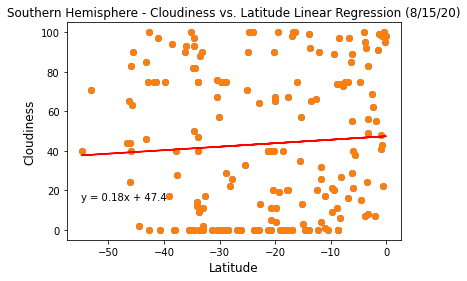

In [145]:
#create scatter plot using hemisphere dataframe
x_values = south_hem['lat']
y_values = south_hem['cloudiness']
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Cloudiness', size=12)

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,15), fontsize = 10, color="black")
plt.savefig("../output_data/reg_south_lat_cloud.png")
print(f'The r-squared is: {rvalue}')
plt.show()

Again, there is no correclation between cloudiness and latitude. The low value of r-squared implies that linear regression does not fit the data well. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.11127151085511808


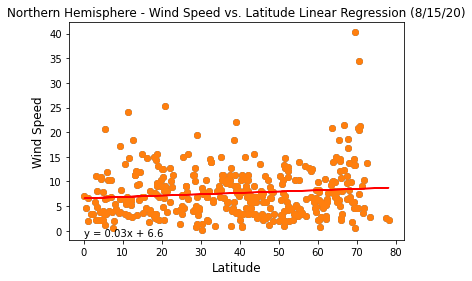

In [146]:
#create scatter plot using hemisphere dataframe
x_values = north_hem['lat']
y_values = north_hem['wind_speed']
plt.scatter(x_values, y_values)
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Wind Speed', size=12)

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,-1), fontsize = 10, color="black")
plt.savefig("../output_data/reg_north_lat_wind.png")
print(f'The r-squared is: {rvalue}')
plt.show()

In regards to wind speed and latitude, there still is no correlation. The low value of r-squared implies that linear regression does not fit the data well despite the appearance of the scatter plot.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3705135716323963


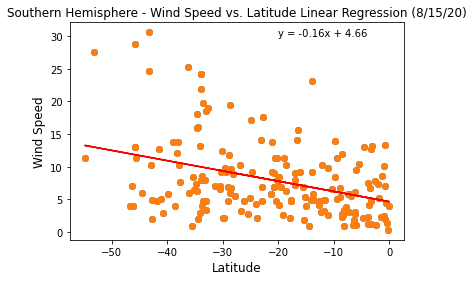

In [147]:
#create scatter plot using hemisphere dataframe
x_values = south_hem['lat']
y_values = south_hem['wind_speed']
plt.scatter(x_values, y_values)
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression (8/15/20)', size=12)
plt.xlabel('Latitude', size=12)
plt.ylabel('Wind Speed', size=12)

## add a linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

## taking the equation from the line above, and calculating the points along the line
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-20,30), fontsize = 10, color="black")
plt.savefig("../output_data/reg_south_lat_wind.png")

print(f'The r-squared is: {rvalue}')
plt.show()

There is a weak, negative correlation between wind and latitude in the Southern Hemisphere. The r-squred value is not a good fit.